In [1]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### (1) 데이터 가져오기

In [2]:
# csv 파일 데이터프레임으로 불러오기
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

print(train.shape)

(10886, 12)


In [3]:
# feature, value 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 결측치, dtype 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 여섯 가지 컬럼 생성하기

In [5]:
# to_datetime() 메소드로 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.drop('datetime', axis=1, inplace=True)

In [6]:
# unique 값 확인. datetime 자료형으로 잘 변환되었는지 확인하기 위함
datetime_columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i, col in enumerate(datetime_columns):
    print(train[col].unique())

[2011 2012]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0]
[0]


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

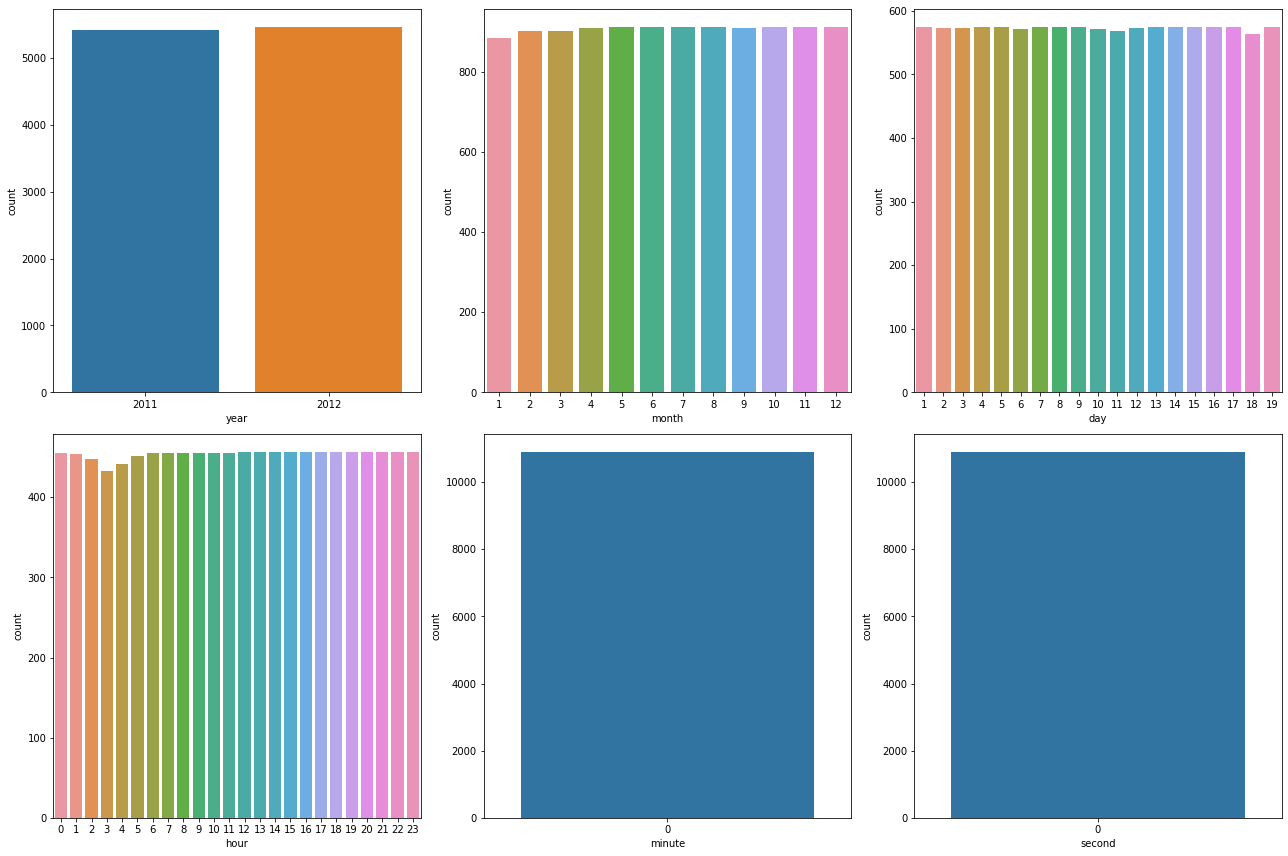

In [7]:
# 총 6개의 그래프이므로 2행 3열의 subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()    # flatten to 1-D array
for i, col in enumerate(datetime_columns):
    sns.countplot(data=train, x=col, ax=axes[i])
plt.tight_layout()    # axes 사이 간격 조정
plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

<AxesSubplot:>

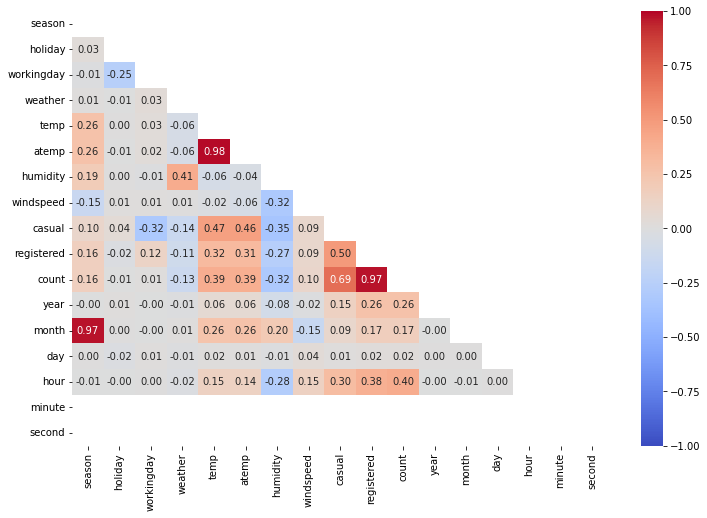

In [8]:
# correlation matrix를 통해 선택할 컬럼 확인

cm = train.corr()
mask = np.triu(cm) # 상삼각행렬로 mask 만듦
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask, ax=ax)    # heatmap으로 시각화

In [9]:
# temp, atemp 둘 중 하나 삭제
# holiday, workingday, day, minute, second: count와의 correlation 매우 낮음
to_drop = ['atemp', 'holiday', 'workingday', 'day', 'minute', 'second', 'count']

# input, target data 분리
df_y = train['count']
df_X = train.drop(to_drop, axis=1)

print(df_X.columns)

# month, season 둘 중 하나 삭제할 수 있음

Index(['season', 'weather', 'temp', 'humidity', 'windspeed', 'casual',
       'registered', 'year', 'month', 'hour'],
      dtype='object')


In [10]:
# dataframe to ndarray
X = df_X.values
y = df_y.values

In [11]:
# train dataset과 test dataset 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)    # default ratio: 25%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8164, 10) (8164,)
(2722, 10) (2722,)


### (5) LinearRegression 모델 학습


In [12]:
# sklearn의 선형회귀 모듈 사용
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [13]:
# X_test에 대한 예측값 출력
predictions = model.predict(X_test)
predictions

array([181.,   8., 566., ...,  10., 197.,  23.])

In [14]:
# 예측값과 실제 정답 간 손실함수 값 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)    # MSE: 오차 제곱의 평균
rmse = mse ** 0.5    # MSE의 제곱근
print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 3.9803346444115666e-25, RMSE: 6.308989336186555e-13


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

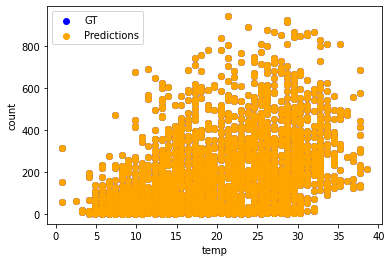

In [15]:
# x축을 temp, y축을 count로 시각화
plt.scatter(X_test[:, 2], y_test, color='blue', label='GT')
plt.scatter(X_test[:, 2], predictions, color='orange', label='Predictions')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

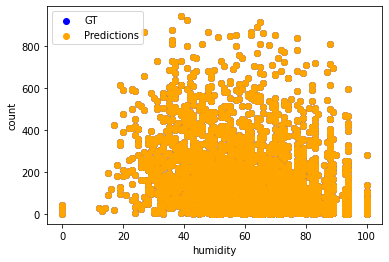

In [16]:
# x축을 humidity, y축을 count로 시각화
plt.scatter(X_test[:, 3], y_test, color='blue', label='GT')
plt.scatter(X_test[:, 3], predictions, color='orange', label='Predictions')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()